# <div style="text-align: center;"><span style="color: orange; background-color: #808000; font-family: 'Times New Roman', serif; font-size: 44px; font-weight: bold; padding: 10px; border-radius: 10px; text-shadow: 4px 5px 6px rgba(0, 0, 0, 0.5);">Analysis of Female and Male Images Data</span></div>

> # <span style="color: #808000">Analysis of Images</span> 🏡💰
![](https://th.bing.com/th/id/OIP.mUJKuNqWAZ7l2tULymPHbQHaFj?pid=ImgDet&w=200&h=150&c=7&dpr=1.5)

##  <span style="color: #FF4500;"></span> <span style="color: orange; font-weight: bold;"> Methodology of the Notebook</span>


1. **Data Collection**:
   - Gather a diverse dataset of male and female images from reliable sources. Ensure the dataset represents a variety of ages, ethnicities, and poses to capture the diversity within each gender. 📊

2. **Data Preprocessing**:
   - Resize images to a standard size to ensure consistency in analysis.
   - Convert images to a common format (e.g., JPEG, PNG).
   - Normalize pixel values to a range (typically 0 to 1) for better convergence during model training. 🔄

3. **Exploratory Data Analysis (EDA)**:
   - **Data Visualization**:
     - Visualize sample images from the dataset to get an overview of the data.
     - Plot distribution of male and female images to understand class balance. 📈
   - **Statistical Analysis**:
     - Calculate basic statistics such as mean, standard deviation, and range of pixel values for male and female images.
     - Perform hypothesis testing (e.g., t-test) to determine if there are significant differences between male and female images in terms of pixel distribution. 📊

4. **Cropping Techniques**:
   - Implement different cropping techniques for male and female images:
     - **Face Detection**:
       - Utilize face detection algorithms (e.g., Haar cascades, Dlib) to detect faces in images.
       - Crop images based on detected face coordinates. 👨‍👩‍👦
     - **Bounding Box Crop**:
       - Use pre-defined bounding boxes or annotations to crop images around the region of interest (e.g., the face, the entire body).
     - **Semantic Segmentation**:
       - Employ semantic segmentation models to segment images into regions corresponding to different body parts.
       - Crop images based on segmented regions (e.g., upper body, lower body). 🖼️
     - **Random Crop**:
       - Experiment with random cropping techniques to extract diverse regions from images, focusing on relevant features such as facial expressions, clothing, etc. 🔄

5. **Evaluation**:
   - Evaluate the effectiveness of each cropping technique in preserving relevant features and removing irrelevant background information.
   - Assess the impact of cropping on downstream tasks (e.g., gender classification, facial expression recognition). 🧐

6. **Documentation and Reporting**:
   - Document the implementation details of each step in the notebook, including code snippets, parameters used, and any notable observations.
   - Provide clear explanations and visualizations to facilitate understanding for yourself and potential readers.
   - Summarize key findings and insights derived from the EDA and cropping experiments. 📝

7. **Future Directions**:
   - Discuss potential extensions or improvements to the methodology, such as exploring advanced cropping techniques, integrating data augmentation, or incorporating feedback from domain experts. 🚀

By following this methodology, you can systematically conduct EDA on male and female images while experimenting with different cropping techniques to enhance the quality and relevance of your data for subsequent analysis tasks.

##  <span style="color: #FF4500;"></span> <span style="color: orange; font-weight: bold;"> About Dataset </span>

The male and female image dataset comprises a diverse collection of images capturing individuals from various demographics, poses, and contexts. This dataset serves as a valuable resource for exploring gender-based visual patterns, conducting facial recognition studies, and developing gender-aware computer vision applications. With balanced representation and meticulous curation, this dataset offers insights into the nuances of gender representation in digital imagery.

##  <span style="color: #FF4500;"></span> <span style="color: orange; font-weight: bold;"> Connect with me :</span>
[![GitHub](https://img.shields.io/badge/GitHub-Profile-blue?style=for-the-badge&logo=github)](https://github.com/nazishjaveed) 

[![Kaggle](https://img.shields.io/badge/Kaggle-Profile-blue?style=for-the-badge&logo=kaggle)](https://www.kaggle.com/nazishjaveed) 

[![LinkedIn](https://img.shields.io/badge/LinkedIn-Profile-blue?style=for-the-badge&logo=linkedin)](https://www.linkedin.com/in/nazish-javeed-395461271/)

 # <span style="color: #FF4500;">Step 1:</span> <span style="color: orange; font-weight: bold;">Import Libraries</span>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from PIL import Image

%matplotlib inline

from glob import glob
from PIL import Image

##  <span style="color: #FF4500;"></span> <span style="color: orange; font-weight: bold;"> About Libraries </span>
Sure, here are the descriptions with emojis:

1. **NumPy** 🧮: NumPy is a powerful library for numerical computing in Python, providing support for large, multi-dimensional arrays and matrices, along with a collection of mathematical functions to operate on these arrays efficiently.

2. **Pandas** 🐼: Pandas is a versatile data analysis and manipulation library in Python, offering data structures like DataFrames and Series, along with tools for reading and writing data from various file formats, handling missing data, and performing operations like grouping, merging, and reshaping datasets.

3. **Matplotlib** 📊: Matplotlib is a comprehensive plotting library in Python, enabling the creation of a wide range of static, interactive, and publication-quality visualizations, including line plots, scatter plots, histograms, bar charts, and more.

4. **CV2** 🖼️: OpenCV (often imported as cv2) is a popular computer vision library in Python, providing a wide range of tools and functions for tasks such as image processing, object detection, feature extraction, and camera calibration.

5. **PIL (Python Imaging Library)** 🖼️: PIL is a library for opening, manipulating, and saving many different image file formats in Python, offering functionality for basic image processing tasks like resizing, cropping, rotating, and enhancing images.

6. **Glob** 🔍: The Glob module provides a convenient way to search for files that match a specified pattern, allowing users to easily find files and directories based on wildcard expressions, making it useful for file handling and data processing tasks.

# <span style="color: #FF4500;">Step 2:</span> <span style="color: orange; font-weight: bold;">Import Dataset</span>

 ##  ``2.1 : Import Female image  of the dataset``

In [2]:
female = glob('./Female Faces/*.png')



  ##  ``2.2 : Import Male image  of the dataset``

In [3]:
male = glob('./Male Faces/*.png')

 ##  ``2.3 :Combining Male and Female Image Paths ``

In [4]:
path = male + female

 ##  ``2.4 :Determining the Total Number of Image Paths ``

In [5]:
len(path)

100

# <span style="color: #FF4500;">Step 3:</span> <span style="color: orange; font-weight: bold;">How To Handle The Size Of Images</span>

 ##  ``3.1 :Opening the First Image from the Path List ``

In [6]:
img = Image.open(path[0]) # To ge

 ##  ``3.2 :Getting the Size of the Image ``

In [7]:
img.size

(429, 527)

 ##  ``3.3 : Function to Get Width of Image from Path``

In [8]:
def getSize(path):
    img = Image.open(path)
    return img.size[0]

# <span style="color: #FF4500;">Step 4:</span> <span style="color: orange; font-weight: bold;">Import Images Through Pandas Library</span>

 ##  ``4.1 : Creating a DataFrame from Image Paths``

In [9]:
df = pd.DataFrame(data = path, columns = ['path']) # to get the path and column of image

 ##  ``4.2 :Displaying the First Few Rows of the DataFrame``

In [10]:
df.head() # show the first five rows

,path
0,./Male Faces\1 (1).png
1,./Male Faces\1 (2).png
2,./Male Faces\1 (3).png
3,./Male Faces\1 (4).png
4,./Male Faces\1 (5).png


 ##  ``4.3 :Displaying the Last Few Rows of the DataFrame``

In [11]:
df.tail() # show the last 5 rows

,path
95,./Female Faces\0 (91).png
96,./Female Faces\0 (92).png
97,./Female Faces\0 (93).png
98,./Female Faces\0 (94).png
99,./Female Faces\0 (95).png


 ##  ``4.4 :Adding Image Sizes to DataFrame Using a Custom Function``

In [12]:
df['size'] = df['path'].apply(getSize) # to get the size of image

In [13]:
df.head()

,path,size
0,./Male Faces\1 (1).png,429
1,./Male Faces\1 (2).png,350
2,./Male Faces\1 (3).png,736
3,./Male Faces\1 (4).png,411
4,./Male Faces\1 (5).png,403


# <span style="color: #FF4500;">Step 5 |</span> <span style="color: orange; font-weight: bold;">Exploratory Data Analysis</span>

 ##  ``5.1 :Generating Descriptive Statistics for Image Sizes in the DataFrame``

In [14]:
df.describe()

,size
count,100.000000
mean,1111.530000
std,710.136201
min,342.000000
25%,521.500000
50%,810.000000
75%,1920.000000
max,2789.000000


 ##  ``5.2 :Printing Column Names of the DataFrame``

In [15]:
print(df.columns)

Index(['path', 'size'], dtype='object')


##  ``5.3 :Creating a Box Plot of Image Sizes``

In [16]:
print(df.columns)

Index(['path', 'size'], dtype='object')


 ##  ``5.4 :Visualizing Distribution of Image Sizes with a Histogram``

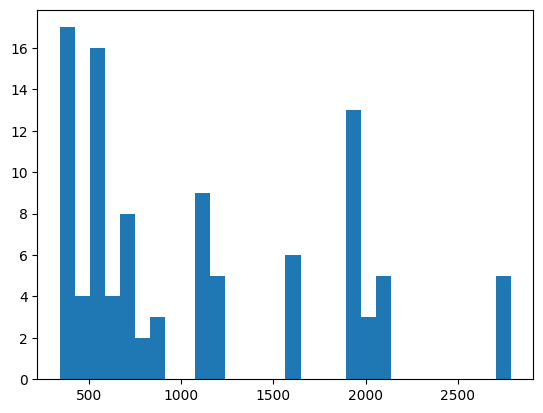

In [17]:
plt.hist(df['size'], bins = 30) # Show the size of image in barplot
plt.show()

 ##  ``5.5 :Filtering DataFrame for Images with Size Greater Than 60``

In [18]:
df_new = df[df['size']>60] # show the size of image less than 60

In [19]:
df_new

,path,size
0,./Male Faces\1 (1).png,429
1,./Male Faces\1 (2).png,350
2,./Male Faces\1 (3).png,736
3,./Male Faces\1 (4).png,411
4,./Male Faces\1 (5).png,403
...,...,...
95,./Female Faces\0 (91).png,1600
96,./Female Faces\0 (92).png,744
97,./Female Faces\0 (93).png,1218
98,./Female Faces\0 (94).png,2126


 ##  ``5.6 :Accessing Path Information from DataFrame``

In [20]:
string = df_new['path'][0]

In [21]:
string

'./Male Faces\\1 (1).png'

 ##  5.7: Gender Extraction Function

In [22]:
def gender (string): # split the image of gender
    try:
        return string.split('_')[0].split('/')[-1]
    except:
        return None

 ## 5.8 :Gender Extraction Function

In [23]:
df['gender'] = df['path'].apply(gender) # add the gender

In [24]:
df

,path,size,gender
0,./Male Faces\1 (1).png,429,Male Faces\1 (1).png
1,./Male Faces\1 (2).png,350,Male Faces\1 (2).png
2,./Male Faces\1 (3).png,736,Male Faces\1 (3).png
3,./Male Faces\1 (4).png,411,Male Faces\1 (4).png
4,./Male Faces\1 (5).png,403,Male Faces\1 (5).png
...,...,...,...
95,./Female Faces\0 (91).png,1600,Female Faces\0 (91).png
96,./Female Faces\0 (92).png,744,Female Faces\0 (92).png
97,./Female Faces\0 (93).png,1218,Female Faces\0 (93).png
98,./Female Faces\0 (94).png,2126,Female Faces\0 (94).png


# <span style="color: #FF4500;">Step 6 |</span> <span style="color: orange; font-weight: bold;">Normalization of Gender</span>

 ##  ``6.1 :"Printing Normalized Gender Distribution of Images``

In [25]:
print(df['gender'].value_counts(normalize = True)) # normalization of gender data of images

gender
Male Faces\1 (1).png       0.01
Female Faces\0 (62).png    0.01
Female Faces\0 (71).png    0.01
Female Faces\0 (70).png    0.01
Female Faces\0 (7).png     0.01
                           ... 
Female Faces\0 (31).png    0.01
Female Faces\0 (30).png    0.01
Female Faces\0 (3).png     0.01
Female Faces\0 (29).png    0.01
Female Faces\0 (95).png    0.01
Name: proportion, Length: 100, dtype: float64


 ##  ``6.2 :Gender Distribution Normalization``
 

In [26]:
df['gender'].value_counts(normalize=True)

gender
Male Faces\1 (1).png       0.01
Female Faces\0 (62).png    0.01
Female Faces\0 (71).png    0.01
Female Faces\0 (70).png    0.01
Female Faces\0 (7).png     0.01
                           ... 
Female Faces\0 (31).png    0.01
Female Faces\0 (30).png    0.01
Female Faces\0 (3).png     0.01
Female Faces\0 (29).png    0.01
Female Faces\0 (95).png    0.01
Name: proportion, Length: 100, dtype: float64

 ##  ``6.3 :Bar Plot of Gender Distribution Normalization``

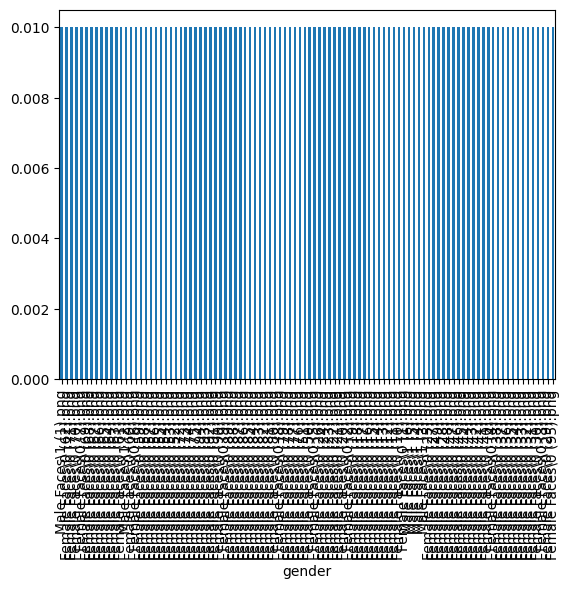

In [27]:
df['gender'].value_counts(normalize = True).plot(kind = 'bar') # show the bar plot of gender normalization
plt.show()

 ##  ``6.4 :"Image Resizing Function"``

In [28]:
def resize_img(path_to_resize):
    try:
        img = cv2.imread(path_to_resize)
        gray = cv2.cvtColor(img, cv2.Color_BGR2GRAY)
        size = gray.shape[0]
        
        if size >= 100:
            gray_re = cv2.resize(gray, (100,100), cv2.INTER_AREA) # SHRINK
        else:
            gray_re = cv2.resize(gray, (100,100), cv2.INTER_CUBIC) #ENLARGE
        return gray_re.flatten()
    except:
        return None

 ##  ``6.5 :"Image Resizing Function"``

In [29]:
result = resize_img(path[0])

if result is not None:
    # Now you can safely use len() on the result
    length_of_result = len(result)
    print(length_of_result)
else:
    print("The result is None. Check the implementation of resize_img.")

The result is None. Check the implementation of resize_img.


In [30]:
df_new

,path,size
0,./Male Faces\1 (1).png,429
1,./Male Faces\1 (2).png,350
2,./Male Faces\1 (3).png,736
3,./Male Faces\1 (4).png,411
4,./Male Faces\1 (5).png,403
...,...,...
95,./Female Faces\0 (91).png,1600
96,./Female Faces\0 (92).png,744
97,./Female Faces\0 (93).png,1218
98,./Female Faces\0 (94).png,2126


 ##  ``6.6 :Applying Gender Detection Function to DataFrame Column 'path``

In [31]:
df_new['gender'] = df_new['path'].apply(gender)

In [32]:
df_new.head()

,path,size,gender
0,./Male Faces\1 (1).png,429,Male Faces\1 (1).png
1,./Male Faces\1 (2).png,350,Male Faces\1 (2).png
2,./Male Faces\1 (3).png,736,Male Faces\1 (3).png
3,./Male Faces\1 (4).png,411,Male Faces\1 (4).png
4,./Male Faces\1 (5).png,403,Male Faces\1 (5).png


 ##  ``6.7 :Applying Image Resizing Function to DataFrame Column 'path``

In [33]:
df_new['structure_data'] = df_new['path'].apply(resize_img)

In [34]:
df_new

,path,size,gender,structure_data
0,./Male Faces\1 (1).png,429,Male Faces\1 (1).png,None
1,./Male Faces\1 (2).png,350,Male Faces\1 (2).png,None
2,./Male Faces\1 (3).png,736,Male Faces\1 (3).png,None
3,./Male Faces\1 (4).png,411,Male Faces\1 (4).png,None
4,./Male Faces\1 (5).png,403,Male Faces\1 (5).png,None
...,...,...,...,...
95,./Female Faces\0 (91).png,1600,Female Faces\0 (91).png,None
96,./Female Faces\0 (92).png,744,Female Faces\0 (92).png,None
97,./Female Faces\0 (93).png,1218,Female Faces\0 (93).png,None
98,./Female Faces\0 (94).png,2126,Female Faces\0 (94).png,None


 ##  ``6.8 :"Separating and Displaying the Structure Data of Images``

In [35]:
df1 = df_new['structure_data'].apply(pd.Series, dtype=float) # Separate show the structure data of images

In [37]:
df1

""
0
1
2
3
4
...
95
96
97
98


 ##  ``6.9 :"Separating and Displaying the Paths of Image``

In [38]:
df2 = df_new['path'].apply(pd.Series) # Separate show the path of images

In [39]:
df2

,0
0,./Male Faces\1 (1).png
1,./Male Faces\1 (2).png
2,./Male Faces\1 (3).png
3,./Male Faces\1 (4).png
4,./Male Faces\1 (5).png
...,...
95,./Female Faces\0 (91).png
96,./Female Faces\0 (92).png
97,./Female Faces\0 (93).png
98,./Female Faces\0 (94).png


 ##  ``6.10 :"Separating and Displaying the Sizes of Images``

In [40]:
df3 = df_new['size'].apply(pd.Series) # Separate show the Size of images

In [41]:
df3

,0
0,429
1,350
2,736
3,411
4,403
...,...
95,1600
96,744
97,1218
98,2126


In [42]:
df_new

,path,size,gender,structure_data
0,./Male Faces\1 (1).png,429,Male Faces\1 (1).png,None
1,./Male Faces\1 (2).png,350,Male Faces\1 (2).png,None
2,./Male Faces\1 (3).png,736,Male Faces\1 (3).png,None
3,./Male Faces\1 (4).png,411,Male Faces\1 (4).png,None
4,./Male Faces\1 (5).png,403,Male Faces\1 (5).png,None
...,...,...,...,...
95,./Female Faces\0 (91).png,1600,Female Faces\0 (91).png,None
96,./Female Faces\0 (92).png,744,Female Faces\0 (92).png,None
97,./Female Faces\0 (93).png,1218,Female Faces\0 (93).png,None
98,./Female Faces\0 (94).png,2126,Female Faces\0 (94).png,None


 ##  ``6.11 :"Concatenating Gender Information with Image Structure Data``

In [43]:
df4 = pd.concat((df_new['gender'],df1), axis = 1) # Apply concatenation on images

In [44]:
df4

,gender
0,Male Faces\1 (1).png
1,Male Faces\1 (2).png
2,Male Faces\1 (3).png
3,Male Faces\1 (4).png
4,Male Faces\1 (5).png
...,...
95,Female Faces\0 (91).png
96,Female Faces\0 (92).png
97,Female Faces\0 (93).png
98,Female Faces\0 (94).png


# <span style="color: #FF4500;">Step 7 |</span> <span style="color: orange; font-weight: bold;">Cropping Of Female and Male Image</span>

 ##  ``7.1 :"Cropping Of Female Image``

In [45]:
# Import the library
from glob import glob

In [46]:
femalepath = glob('./Female Faces/*.jpg') # import the image

In [47]:
len(femalepath) # lenght of female path

2547

In [48]:
path = femalepath[0] # Take THe first image of female to perform the work

In [49]:
img = cv2.imread(path) # Read The Image

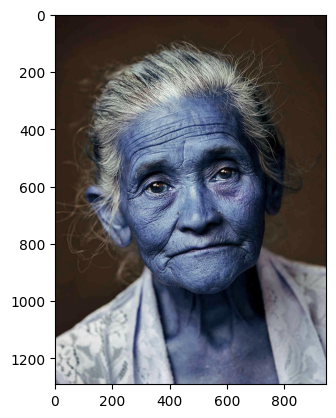

In [50]:
plt.imshow(img) # Show The Read Image

In [51]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # convert the BGR image to gray

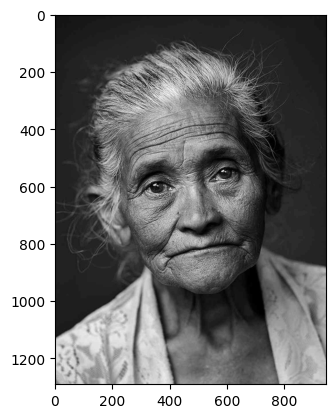

In [52]:
plt.imshow(gray, cmap = 'gray') # Show the BGR image

In [53]:
haar = cv2.CascadeClassifier('./haarcascade_frontalface_default.xml') # use xml files for detect the img

In [54]:
faces = haar.detectMultiScale(gray, scaleFactor=1.5, minNeighbors=4) # Create the coordinates of img
print(faces)

[[159 323 615 615]]


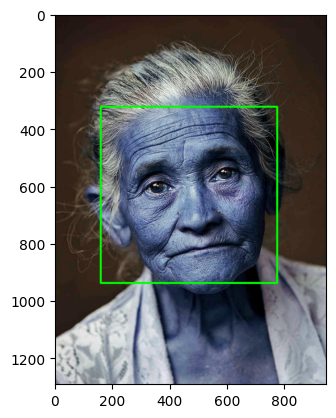

In [56]:
for x,y,w,h in faces:
    cv2.rectangle(img, (x,y), (x+w, y+h), (0,255,0),5) # detect the face of image
plt.imshow(img)   

In [58]:
crop_img = img[y:y+h, x:x+h] # crop the image

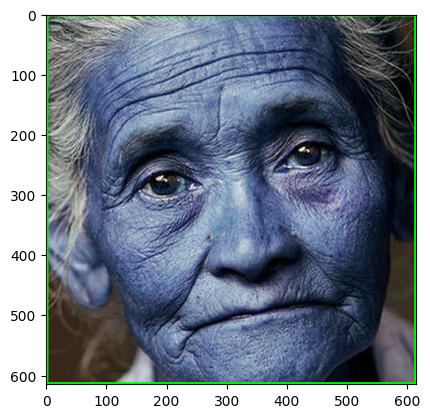

In [59]:
plt.imshow(crop_img) # Show The Crop Image

In [60]:
cv2.imwrite('f_0 (1).jpg', crop_img) # save the crop img into folder

True

 ##  ``7.2 :"Cropping Of Male Image``

In [61]:
malepath = glob('./Male Faces/*.jpg')

In [62]:
len(malepath) # length of male path

837

In [63]:
path = malepath[0] # Take the first image to perform the work

In [64]:
img = cv2.imread(path) # Read the image

In [65]:
img = cv2.imread(path) # Read the image

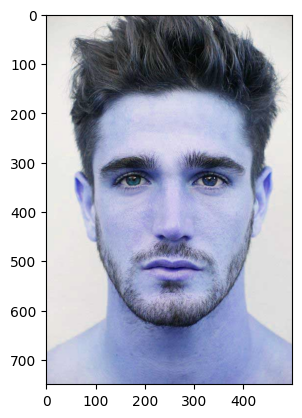

In [66]:
plt.imshow(img) # Show the image

In [67]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # convert the BGR image to gray

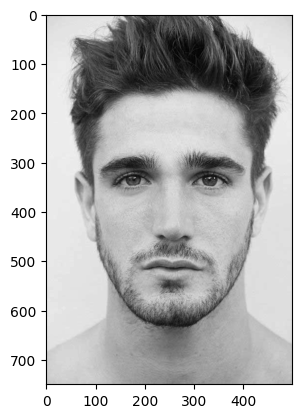

In [68]:
plt.imshow(gray, cmap = 'gray') # Show the BGR image

In [69]:
haar = cv2.CascadeClassifier('./haarcascade_frontalface_default.xml') # use xml files for detect the img

In [70]:
faces = haar.detectMultiScale(gray, scaleFactor=1.5, minNeighbors=5) # Create the coordinates of img
print(faces)

[[ 44 171 410 410]]


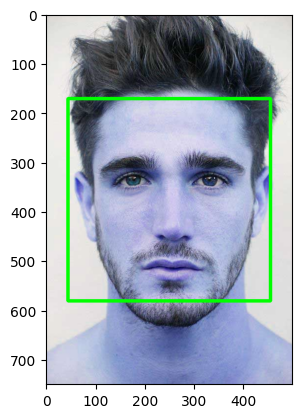

In [71]:
for x,y,w,h in faces:
    cv2.rectangle(img, (x,y), (x+w, y+h), (0,255,0),5) # detect the face of image
plt.imshow(img)  

In [72]:
crop_img = img[y:y+h, x:x+h] # crop the image

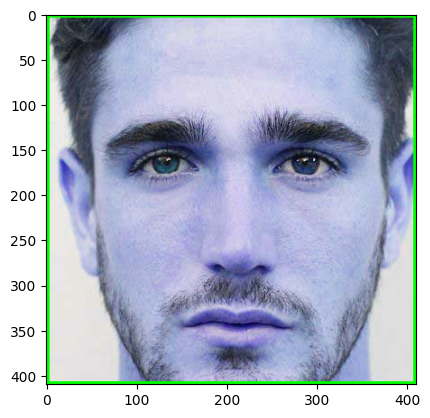

In [73]:
plt.imshow(crop_img) # Show the crop image

In [74]:
cv2.imwrite('f_1 (1).jpg', crop_img) # save the crop img into folder

True

<p style="background-color: #800080;font-family:Arial, sans-serif;color:white ;font-size:20px;text-align:center;padding:20px;border-radius:20px;">
   If you found this notebook beneficial, I'd greatly appreciate an upvote! 🌟 Feel free to drop a comment for any questions or suggestions you might have. 📝 Your feedback is valuable and helps me improve. Thank you for your support! 🙏".<br>
    <strong>✨Best Wishes✨</strong>
</p>